In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.reset_option('max_rows')
import seaborn as sns
import warnings
import numpy as np
import os

warnings.filterwarnings('ignore')
plt.rc('font',family='Batang')
plt.rcParams["figure.figsize"] = (10,10)

In [2]:
os.chdir(r'../활용 데이터셋')

In [3]:
buy2018_1 = pd.read_csv(r"buy2018_1.csv",parse_dates=['buy2018_1.date'])
buy2018_2 = pd.read_csv(r"buy2018_2.csv",parse_dates=['buy2018_2.date'])
buy2019_1 = pd.read_csv(r"buy2019_1.csv",parse_dates=['buy2019_1.date'])
buy2019_2 = pd.read_csv(r"buy2019_2.csv",parse_dates=['buy2019_2.date'])

In [4]:
buy2018_1 = buy2018_1.drop(['Unnamed: 0'], axis=1)
buy2018_2 = buy2018_2.drop(['Unnamed: 0'], axis=1)
buy2019_1 = buy2019_1.drop(['Unnamed: 0'], axis=1)
buy2019_2 = buy2019_2.drop(['Unnamed: 0'], axis=1)

In [5]:
buy2018_1 = buy2018_1.rename(columns = {'buy2018_1.date':'date', 'buy2018_1.sex':'sex', 'buy2018_1.age':'age', 'buy2018_1.big_cat':'big_cat', 
                                        'buy2018_1.sm_cat':'sm_cat', 'buy2018_1.qty':'qty'})
buy2018_2 = buy2018_2.rename(columns = {'buy2018_2.date':'date', 'buy2018_2.sex':'sex', 'buy2018_2.age':'age', 'buy2018_2.big_cat':'big_cat', 
                                        'buy2018_2.sm_cat':'sm_cat', 'buy2018_2.qty':'qty'})
buy2019_1 = buy2019_1.rename(columns = {'buy2019_1.date':'date', 'buy2019_1.sex':'sex', 'buy2019_1.age':'age', 'buy2019_1.big_cat':'big_cat', 
                                        'buy2019_1.sm_cat':'sm_cat', 'buy2019_1.qty':'qty'})
buy2019_2 = buy2019_2.rename(columns = {'buy2019_2.date':'date', 'buy2019_2.sex':'sex', 'buy2019_2.age':'age', 'buy2019_2.big_cat':'big_cat', 
                                        'buy2019_2.sm_cat':'sm_cat', 'buy2019_2.qty':'qty'})

In [6]:
buy2018 = pd.concat([buy2018_1,buy2018_2],ignore_index=True)
buy2019 = pd.concat([buy2019_1,buy2019_2],ignore_index=True)

In [7]:
buy = pd.concat([buy2018, buy2019], ignore_index = True)

In [8]:
buy

,date,sex,age,big_cat,sm_cat,qty
0,2018-01-01,F,20,식품,가공란,37
1,2018-01-01,F,30,식품,가공란,16
2,2018-01-01,F,40,식품,가공란,9
3,2018-01-01,F,50,식품,가공란,3
4,2018-01-01,M,20,식품,가공란,13
...,...,...,...,...,...,...
2056894,2019-12-31,M,20,냉난방가전,히터,8
2056895,2019-12-31,M,30,냉난방가전,히터,22
2056896,2019-12-31,M,40,냉난방가전,히터,38
2056897,2019-12-31,M,50,냉난방가전,히터,23


In [9]:
# 분석 주제에 맞게 냉난방 가전만 대상으로 선정
buy_fd = buy[buy['big_cat'] == '냉난방가전']

In [10]:
buy_fd

,date,sex,age,big_cat,sm_cat,qty
7,2018-01-01,F,20,냉난방가전,가열식 가습기,1
8,2018-01-01,F,40,냉난방가전,가열식 가습기,3
9,2018-01-01,M,20,냉난방가전,가열식 가습기,1
10,2018-01-01,M,40,냉난방가전,가열식 가습기,2
291,2018-01-01,F,20,냉난방가전,공기정화 용품,10
...,...,...,...,...,...,...
2056894,2019-12-31,M,20,냉난방가전,히터,8
2056895,2019-12-31,M,30,냉난방가전,히터,22
2056896,2019-12-31,M,40,냉난방가전,히터,38
2056897,2019-12-31,M,50,냉난방가전,히터,23


In [11]:
buy_fd= pd.DataFrame(buy_fd.groupby(['sm_cat','date'])[('qty')].sum())
buy_fd = buy_fd.reset_index()
buy_fd=buy_fd.rename(columns={'date':'일시'})

In [12]:
buy_fd['일시']=buy_fd['일시'].astype(str)
buy_fd

,sm_cat,일시,qty
0,가스온수기,2018-01-13,1
1,가스온수기,2018-01-17,1
2,가스온수기,2018-01-19,1
3,가스온수기,2018-01-29,2
4,가스온수기,2018-02-02,1
...,...,...,...
23427,히터,2019-12-27,233
23428,히터,2019-12-28,79
23429,히터,2019-12-29,122
23430,히터,2019-12-30,183


In [13]:
buy_fd=buy_fd.set_index('sm_cat')
buy_fd

,일시,qty
sm_cat,,
가스온수기,2018-01-13,1
가스온수기,2018-01-17,1
가스온수기,2018-01-19,1
가스온수기,2018-01-29,2
가스온수기,2018-02-02,1
...,...,...
히터,2019-12-27,233
히터,2019-12-28,79
히터,2019-12-29,122


In [14]:
buy_fd

,일시,qty
sm_cat,,
가스온수기,2018-01-13,1
가스온수기,2018-01-17,1
가스온수기,2018-01-19,1
가스온수기,2018-01-29,2
가스온수기,2018-02-02,1
...,...,...
히터,2019-12-27,233
히터,2019-12-28,79
히터,2019-12-29,122


### 냉방

**냉방가전**

멀티형 에어컨 / 벽걸이 에어컨 / 벽걸이형 선풍기 / 스탠드형 에어컨 / 에어컨 리모컨 / 탁상/USB 선풍기 / 휴대용 선풍기 / 냉풍기 / 이동형 에어컨 / 중대형 에어컨 / 천장형 에어컨 / 에어커튼 / 업소용 선풍기

In [15]:
# 기상 데이터 불러오기
# 체감온도와 열지수는 따로 계산

total_1=pd.read_csv(r'TOTAL_온도.csv')
total_1=total_1.drop(['Unnamed: 0'],axis=1)
total_1

,일시,평균기온(°C),최저기온(°C),최고기온(°C),체감온도,열지수
0,2018-01-01,-1.076923,-5.607495,4.460158,-0.691516,22.791758
1,2018-01-02,-0.494862,-5.861067,4.953755,-0.108084,23.947132
2,2018-01-03,-2.437154,-6.161660,2.143676,-2.749178,20.096956
3,2018-01-04,-2.477909,-6.495661,1.413807,-1.923698,20.018996
4,2018-01-05,-0.992110,-4.478063,3.713241,-0.750031,22.962141
...,...,...,...,...,...,...
725,2019-12-27,-0.089084,-3.803899,4.322612,-0.257046,24.749457
726,2019-12-28,0.474903,-4.850980,6.946667,1.654966,25.869496
727,2019-12-29,3.173879,-1.854813,7.169941,4.108163,31.219883
728,2019-12-30,4.653137,-0.840119,9.321739,4.941824,34.151001


In [16]:
# 냉방 가전만 선정

buy_fd_1=buy_fd.loc[['멀티형 에어컨', '벽걸이 에어컨', '벽걸이형 선풍기', '스탠드형 에어컨', 
                     '에어컨 리모컨', '탁상/USB 선풍기','휴대용 선풍기', '냉풍기', '이동형 에어컨', 
                     '중대형 에어컨', '천장형 에어컨', '에어커튼', '업소용 선풍기']]
buy_fd_1.reset_index(inplace=True)
buy_fd_1

,sm_cat,일시,qty
0,멀티형 에어컨,2018-01-02,2
1,멀티형 에어컨,2018-01-04,1
2,멀티형 에어컨,2018-01-05,3
3,멀티형 에어컨,2018-01-06,1
4,멀티형 에어컨,2018-01-08,1
...,...,...,...
7250,업소용 선풍기,2019-12-17,4
7251,업소용 선풍기,2019-12-21,1
7252,업소용 선풍기,2019-12-22,2
7253,업소용 선풍기,2019-12-24,1


In [17]:
# 구매 데이터와 기상 데이터 병합

buy_weather_1=pd.merge(buy_fd_1,total_1, how='left', left_on='일시', right_on='일시')
buy_weather_1

,sm_cat,일시,qty,평균기온(°C),최저기온(°C),최고기온(°C),체감온도,열지수
0,멀티형 에어컨,2018-01-02,2,-0.494862,-5.861067,4.953755,-0.108084,23.947132
1,멀티형 에어컨,2018-01-04,1,-2.477909,-6.495661,1.413807,-1.923698,20.018996
2,멀티형 에어컨,2018-01-05,3,-0.992110,-4.478063,3.713241,-0.750031,22.962141
3,멀티형 에어컨,2018-01-06,1,-1.503162,-6.079842,4.484387,-1.378344,21.949876
4,멀티형 에어컨,2018-01-08,1,2.131275,-0.356287,4.920559,2.386547,29.156309
...,...,...,...,...,...,...,...,...
7250,업소용 선풍기,2019-12-17,4,8.146169,3.523379,12.200393,8.949775,41.069183
7251,업소용 선풍기,2019-12-21,1,0.207059,-4.348728,4.598239,1.171200,25.341896
7252,업소용 선풍기,2019-12-22,2,2.971765,-1.029608,8.497843,4.301574,30.817982
7253,업소용 선풍기,2019-12-24,1,1.623922,-2.413137,8.173137,2.866271,28.149075


In [18]:
df_time_1 = pd.to_datetime(buy_weather_1.일시) 
datetime_index_1 = pd.DatetimeIndex(df_time_1.values) 
buy_weather_1 = buy_weather_1.set_index(datetime_index_1)

# 계절별로 분류

# 겨울(12월, 1월, 2월)
buy_1=buy_weather_1[buy_weather_1.index.month == 1]
buy_1.reset_index(inplace=True)
buy_1.drop(['index'],axis=1,inplace=True)

buy_2=buy_weather_1[buy_weather_1.index.month == 2]
buy_2.reset_index(inplace=True)
buy_2.drop(['index'],axis=1,inplace=True)

buy_12=buy_weather_1[buy_weather_1.index.month == 12]
buy_12.reset_index(inplace=True)
buy_12.drop(['index'],axis=1,inplace=True)

buy_winter=pd.concat([buy_1,buy_2,buy_12],ignore_index = True)


buy_winter=buy_winter.groupby(['sm_cat'])['qty'].sum()
buy_winter=pd.DataFrame(buy_winter)
buy_winter=buy_winter.rename(columns={'qty':'winter'})
buy_winter.reset_index(inplace=True)


# ===========================================================================================

# 봄(3월, 4월, 5월)
buy_3=buy_weather_1[buy_weather_1.index.month == 3]
buy_3.reset_index(inplace=True)
buy_3.drop(['index'],axis=1,inplace=True)

buy_4=buy_weather_1[buy_weather_1.index.month == 4]
buy_4.reset_index(inplace=True)
buy_4.drop(['index'],axis=1,inplace=True)

buy_5=buy_weather_1[buy_weather_1.index.month == 5]
buy_5.reset_index(inplace=True)
buy_5.drop(['index'],axis=1,inplace=True)

buy_spring=pd.concat([buy_3,buy_4,buy_5],ignore_index = True)

buy_spring=buy_spring.groupby(['sm_cat'])['qty'].sum()
buy_spring=pd.DataFrame(buy_spring)
buy_spring=buy_spring.rename(columns={'qty':'spring'})
buy_spring.reset_index(inplace=True)


# ===========================================================================================

# 여름(6월, 7월, 8월)
buy_6=buy_weather_1[buy_weather_1.index.month == 6]
buy_6.reset_index(inplace=True)
buy_6.drop(['index'],axis=1,inplace=True)

buy_7=buy_weather_1[buy_weather_1.index.month == 7]
buy_7.reset_index(inplace=True)
buy_7.drop(['index'],axis=1,inplace=True)

buy_8=buy_weather_1[buy_weather_1.index.month == 8]
buy_8.reset_index(inplace=True)
buy_8.drop(['index'],axis=1,inplace=True)



buy_summer=pd.concat([buy_6,buy_7,buy_8],ignore_index = True)

buy_summer=buy_summer.groupby(['sm_cat'])['qty'].sum()
buy_summer=pd.DataFrame(buy_summer)
buy_summer=buy_summer.rename(columns={'qty':'summer'})
buy_summer.reset_index(inplace=True)


# ===========================================================================================

# 가을(9월, 10월, 11월)
buy_9=buy_weather_1[buy_weather_1.index.month == 9]
buy_9.reset_index(inplace=True)
buy_9.drop(['index'],axis=1,inplace=True)

buy_10=buy_weather_1[buy_weather_1.index.month == 10]
buy_10.reset_index(inplace=True)
buy_10.drop(['index'],axis=1,inplace=True)

buy_11=buy_weather_1[buy_weather_1.index.month == 11]
buy_11.reset_index(inplace=True)
buy_11.drop(['index'],axis=1,inplace=True)

buy_fall=pd.concat([buy_9,buy_10,buy_11],ignore_index = True)

buy_fall=buy_fall.groupby(['sm_cat'])['qty'].sum()
buy_fall=pd.DataFrame(buy_fall)
buy_fall=buy_fall.rename(columns={'qty':'fall'})
buy_fall.reset_index(inplace=True)

In [19]:
buy_ALL=pd.merge(buy_spring,buy_summer,how='outer',left_on='sm_cat',right_on='sm_cat')  # 봄, 여룸 병합

In [20]:
buy_ALL=pd.merge(buy_ALL,buy_fall,how='outer',left_on='sm_cat',right_on='sm_cat')   # 봄, 여름, 가을 병합

In [21]:
buy_ALL=pd.merge(buy_ALL,buy_winter,how='outer',left_on='sm_cat',right_on='sm_cat')   # 봄, 여름, 가을, 겨울 병합

In [22]:
buy_ALL=buy_ALL.set_index('sm_cat')
buy_ALL

,spring,summer,fall,winter
sm_cat,,,,
냉풍기,1755,14945,427,430
멀티형 에어컨,9647,5456,242,1068
벽걸이 에어컨,13789,18279,864,1051
벽걸이형 선풍기,2854,8160,754,406
스탠드형 에어컨,22046,13889,1508,2780
업소용 선풍기,1217,8366,369,175
에어커튼,67,142,58,57
에어컨 리모컨,959,5311,434,337
이동형 에어컨,1807,8930,463,332


In [23]:
buy_ALL=buy_ALL.T

In [24]:
buy_ALL.reset_index(inplace=True)
buy_ALL.rename(columns={'index':'season'},inplace=True)
buy_ALL

sm_cat,season,냉풍기,멀티형 에어컨,벽걸이 에어컨,벽걸이형 선풍기,스탠드형 에어컨,업소용 선풍기,에어커튼,에어컨 리모컨,이동형 에어컨,중대형 에어컨,천장형 에어컨,탁상/USB 선풍기,휴대용 선풍기
0,spring,1755,9647,13789,2854,22046,1217,67,959,1807,54,185,4939,9773
1,summer,14945,5456,18279,8160,13889,8366,142,5311,8930,51,281,11525,42302
2,fall,427,242,864,754,1508,369,58,434,463,21,133,948,921
3,winter,430,1068,1051,406,2780,175,57,337,332,12,109,496,702


<AxesSubplot:xlabel='season', ylabel='업소용 선풍기'>

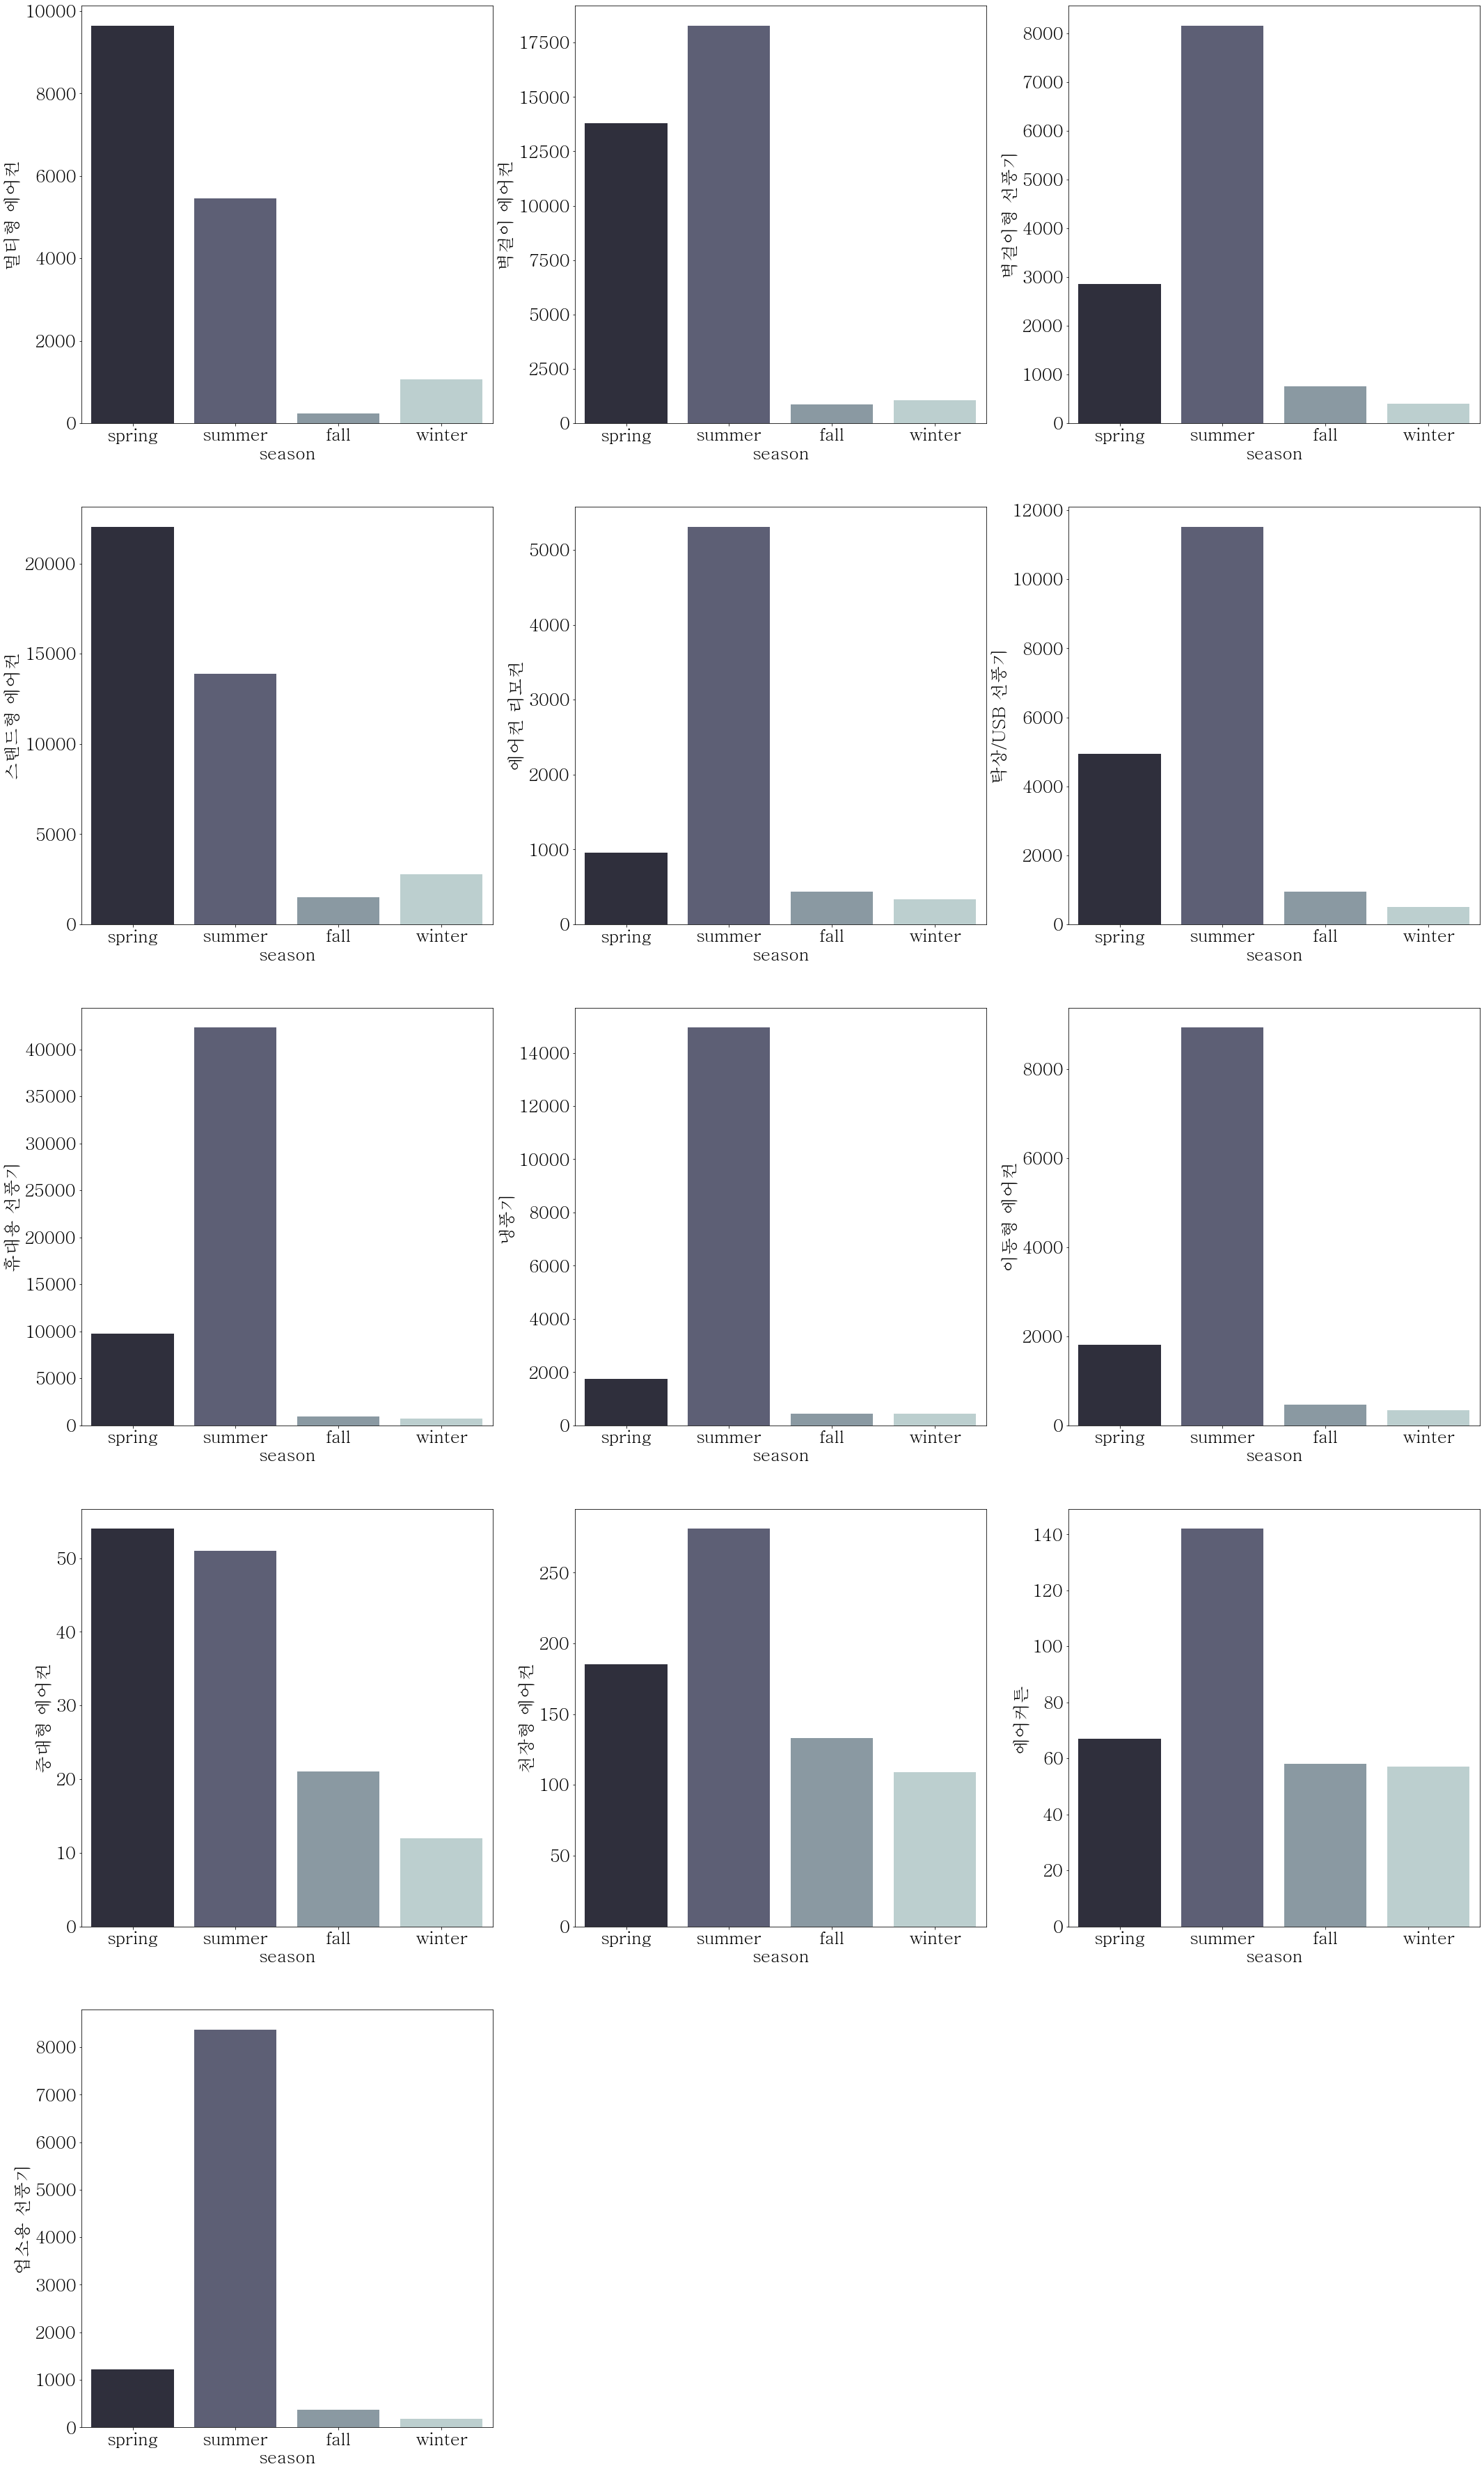

In [25]:
# 각 상품에 대해 계절별 판매량 그래프 출력


plt.figure(figsize=[36,64])
plt.rc('font', size=25)
plt.subplot(5,3,1)
sns.barplot(data=buy_ALL,x='season',y='멀티형 에어컨',palette='bone')

plt.subplot(5,3,2)
sns.barplot(data=buy_ALL,x='season',y='벽걸이 에어컨',palette='bone')

plt.subplot(5,3,3)
sns.barplot(data=buy_ALL,x='season',y='벽걸이형 선풍기',palette='bone')

plt.subplot(5,3,4)
sns.barplot(data=buy_ALL,x='season',y='스탠드형 에어컨',palette='bone')

plt.subplot(5,3,5)
sns.barplot(data=buy_ALL,x='season',y='에어컨 리모컨',palette='bone')

plt.subplot(5,3,6)
sns.barplot(data=buy_ALL,x='season',y='탁상/USB 선풍기',palette='bone')

plt.subplot(5,3,7)
sns.barplot(data=buy_ALL,x='season',y='휴대용 선풍기',palette='bone')

plt.subplot(5,3,8)
sns.barplot(data=buy_ALL,x='season',y='냉풍기',palette='bone')

plt.subplot(5,3,9)
sns.barplot(data=buy_ALL,x='season',y='이동형 에어컨',palette='bone')

plt.subplot(5,3,10)
sns.barplot(data=buy_ALL,x='season',y='중대형 에어컨',palette='bone')

plt.subplot(5,3,11)
sns.barplot(data=buy_ALL,x='season',y='천장형 에어컨',palette='bone')

plt.subplot(5,3,12)
sns.barplot(data=buy_ALL,x='season',y='에어커튼',palette='bone')

plt.subplot(5,3,13)
sns.barplot(data=buy_ALL,x='season',y='업소용 선풍기',palette='bone')


In [26]:
# 계절별 냉방가전의 판매량 합계
buy_ALL_sum = buy_ALL.sum(axis=1)
buy_ALL_sum

0     69092
1    137637
2      7142
3      7955
dtype: int64

In [27]:
names=['spring','summer','fall','winter']
explode=(0,0.03,0,0)

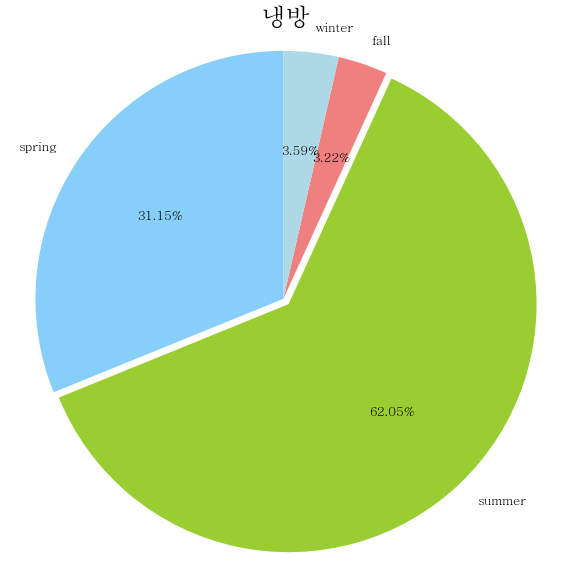

In [28]:
# 냉방가전 전체 판매량의 계절별 비율
plt.pie(buy_ALL_sum,
        explode=explode,
        labels=names,
        autopct='%1.2f%%',
        colors=['lightskyblue','yellowgreen','lightcoral','lightblue'],
       shadow=False,
       startangle=90,
       textprops={'fontsize':13})
plt.axis('equal')
plt.title('냉방',fontsize=25)
plt.show()

### 난방

**난방가전**

가스온수기 / 난방용 열풍기 / 돈풍기 / 라디에이터 / 보일러 / 온수매트 / 온열매트 / 온풍기 / 전기온수기 / 전기장판 / 카페트매트 / 컨벡터 / 황토매트 / 히터


In [29]:
buy_fd_1_1=buy_fd.loc[['가스온수기', '가열식 가습기', '난방용 열풍기', '돈풍기', '라디에이터', '보일러', '온수매트', '온열매트',
       '온풍기', '전기온수기', '전기장판', '카페트매트', '컨벡터', '황토매트', '히터']]
buy_fd_1_1.reset_index(inplace=True)
buy_fd_1_1

,sm_cat,일시,qty
0,가스온수기,2018-01-13,1
1,가스온수기,2018-01-17,1
2,가스온수기,2018-01-19,1
3,가스온수기,2018-01-29,2
4,가스온수기,2018-02-02,1
...,...,...,...
8628,히터,2019-12-27,233
8629,히터,2019-12-28,79
8630,히터,2019-12-29,122
8631,히터,2019-12-30,183


In [30]:
# 구매 데이터와 기상 데이터 병합

buy_weather_1_1=pd.merge(buy_fd_1_1,total_1, how='left', left_on='일시', right_on='일시')
buy_weather_1_1

,sm_cat,일시,qty,평균기온(°C),최저기온(°C),최고기온(°C),체감온도,열지수
0,가스온수기,2018-01-13,1,-3.685828,-8.640719,2.032535,-2.978124,17.634558
1,가스온수기,2018-01-17,1,3.906139,1.162178,7.499802,4.970363,32.675597
2,가스온수기,2018-01-19,1,0.716963,-3.344379,6.536884,1.513794,26.346149
3,가스온수기,2018-01-29,2,-6.496414,-9.936183,-2.337972,-7.639590,12.059606
4,가스온수기,2018-02-02,1,-2.955446,-8.610693,3.691881,-2.520548,19.071703
...,...,...,...,...,...,...,...,...
8628,히터,2019-12-27,233,-0.089084,-3.803899,4.322612,-0.257046,24.749457
8629,히터,2019-12-28,79,0.474903,-4.850980,6.946667,1.654966,25.869496
8630,히터,2019-12-29,122,3.173879,-1.854813,7.169941,4.108163,31.219883
8631,히터,2019-12-30,183,4.653137,-0.840119,9.321739,4.941824,34.151001


In [31]:
df_time_1_1 = pd.to_datetime(buy_weather_1_1.일시) 
datetime_index_1_1 = pd.DatetimeIndex(df_time_1_1.values) 
buy_weather_1_1 = buy_weather_1_1.set_index(datetime_index_1_1)


# 계절별로 분류

# 겨울(12월, 1월, 2월)
buy_1=buy_weather_1_1[buy_weather_1_1.index.month == 1]
buy_1.reset_index(inplace=True)
buy_1.drop(['index'],axis=1,inplace=True)

buy_2=buy_weather_1_1[buy_weather_1_1.index.month == 2]
buy_2.reset_index(inplace=True)
buy_2.drop(['index'],axis=1,inplace=True)

buy_12=buy_weather_1_1[buy_weather_1_1.index.month == 12]
buy_12.reset_index(inplace=True)
buy_12.drop(['index'],axis=1,inplace=True)

buy_winter=pd.concat([buy_1,buy_2,buy_12],ignore_index = True)
buy_winter

buy_winter=buy_winter.groupby(['sm_cat'])['qty'].sum()
buy_winter=pd.DataFrame(buy_winter)
buy_winter=buy_winter.rename(columns={'qty':'winter'})
buy_winter.reset_index(inplace=True)
buy_winter


# ===========================================================================================

# 봄(3월, 4월, 5월)
buy_3=buy_weather_1_1[buy_weather_1_1.index.month == 3]
buy_3.reset_index(inplace=True)
buy_3.drop(['index'],axis=1,inplace=True)

buy_4=buy_weather_1_1[buy_weather_1_1.index.month == 4]
buy_4.reset_index(inplace=True)
buy_4.drop(['index'],axis=1,inplace=True)

buy_5=buy_weather_1_1[buy_weather_1_1.index.month == 5]
buy_5.reset_index(inplace=True)
buy_5.drop(['index'],axis=1,inplace=True)

buy_spring=pd.concat([buy_3,buy_4,buy_5],ignore_index = True)

buy_spring=buy_spring.groupby(['sm_cat'])['qty'].sum()
buy_spring=pd.DataFrame(buy_spring)
buy_spring=buy_spring.rename(columns={'qty':'spring'})
buy_spring.reset_index(inplace=True)
buy_spring


# ===========================================================================================

# 여름(6월, 7월, 8월)
buy_6=buy_weather_1_1[buy_weather_1_1.index.month == 6]
buy_6.reset_index(inplace=True)
buy_6.drop(['index'],axis=1,inplace=True)

buy_7=buy_weather_1_1[buy_weather_1_1.index.month == 7]
buy_7.reset_index(inplace=True)
buy_7.drop(['index'],axis=1,inplace=True)

buy_8=buy_weather_1_1[buy_weather_1_1.index.month == 8]
buy_8.reset_index(inplace=True)
buy_8.drop(['index'],axis=1,inplace=True)

buy_summer=pd.concat([buy_6,buy_7,buy_8],ignore_index = True)

buy_summer=buy_summer.groupby(['sm_cat'])['qty'].sum()
buy_summer=pd.DataFrame(buy_summer)
buy_summer=buy_summer.rename(columns={'qty':'summer'})
buy_summer.reset_index(inplace=True)
buy_summer


# ===========================================================================================

# 가을(9월, 10월, 11월)
buy_9=buy_weather_1_1[buy_weather_1_1.index.month == 9]
buy_9.reset_index(inplace=True)
buy_9.drop(['index'],axis=1,inplace=True)

buy_10=buy_weather_1_1[buy_weather_1_1.index.month == 10]
buy_10.reset_index(inplace=True)
buy_10.drop(['index'],axis=1,inplace=True)

buy_11=buy_weather_1_1[buy_weather_1_1.index.month == 11]
buy_11.reset_index(inplace=True)
buy_11.drop(['index'],axis=1,inplace=True)

buy_fall=pd.concat([buy_9,buy_10,buy_11],ignore_index = True)

buy_fall=buy_fall.groupby(['sm_cat'])['qty'].sum()
buy_fall=pd.DataFrame(buy_fall)
buy_fall=buy_fall.rename(columns={'qty':'fall'})
buy_fall.reset_index(inplace=True)
buy_fall



,sm_cat,fall
0,가스온수기,57
1,가열식 가습기,1967
2,난방용 열풍기,68
3,돈풍기,581
4,라디에이터,4521
5,보일러,642
6,온수매트,51389
7,온열매트,41726
8,온풍기,13024
9,전기온수기,3098


In [32]:
buy_ALL=pd.merge(buy_spring,buy_summer,how='outer',left_on='sm_cat',right_on='sm_cat')    # 봄, 여룸 병합

In [33]:
buy_ALL=pd.merge(buy_ALL,buy_fall,how='outer',left_on='sm_cat',right_on='sm_cat')    # 봄, 여룸, 가을 병합

In [34]:
buy_ALL=pd.merge(buy_ALL,buy_winter,how='outer',left_on='sm_cat',right_on='sm_cat')      # 봄, 여룸, 가을, 겨울 병합

In [35]:
buy_ALL=buy_ALL.set_index('sm_cat')
buy_ALL

,spring,summer,fall,winter
sm_cat,,,,
가스온수기,27,24,57,43
가열식 가습기,348,94,1967,2542
난방용 열풍기,19,4,68,139
돈풍기,155,300,581,796
라디에이터,625,284,4521,6342
보일러,694,357,642,676
온수매트,3384,995,51389,18748
온열매트,33291,27767,41726,33541
온풍기,1157,543,13024,15220


In [36]:
buy_ALL=buy_ALL.T

In [37]:
buy_ALL.reset_index(inplace=True)
buy_ALL.rename(columns={'index':'season'},inplace=True)
buy_ALL

sm_cat,season,가스온수기,가열식 가습기,난방용 열풍기,돈풍기,라디에이터,보일러,온수매트,온열매트,온풍기,전기온수기,전기장판,카페트매트,컨벡터,황토매트,히터
0,spring,27,348,19,155,625,694,3384,33291,1157,1510,3552,510,260,741,3522
1,summer,24,94,4,300,284,357,995,27767,543,1016,1121,173,88,177,2008
2,fall,57,1967,68,581,4521,642,51389,41726,13024,3098,25542,8347,3509,2862,35920
3,winter,43,2542,139,796,6342,676,18748,33541,15220,2835,11352,2308,4193,1659,38933


<AxesSubplot:xlabel='season', ylabel='히터'>

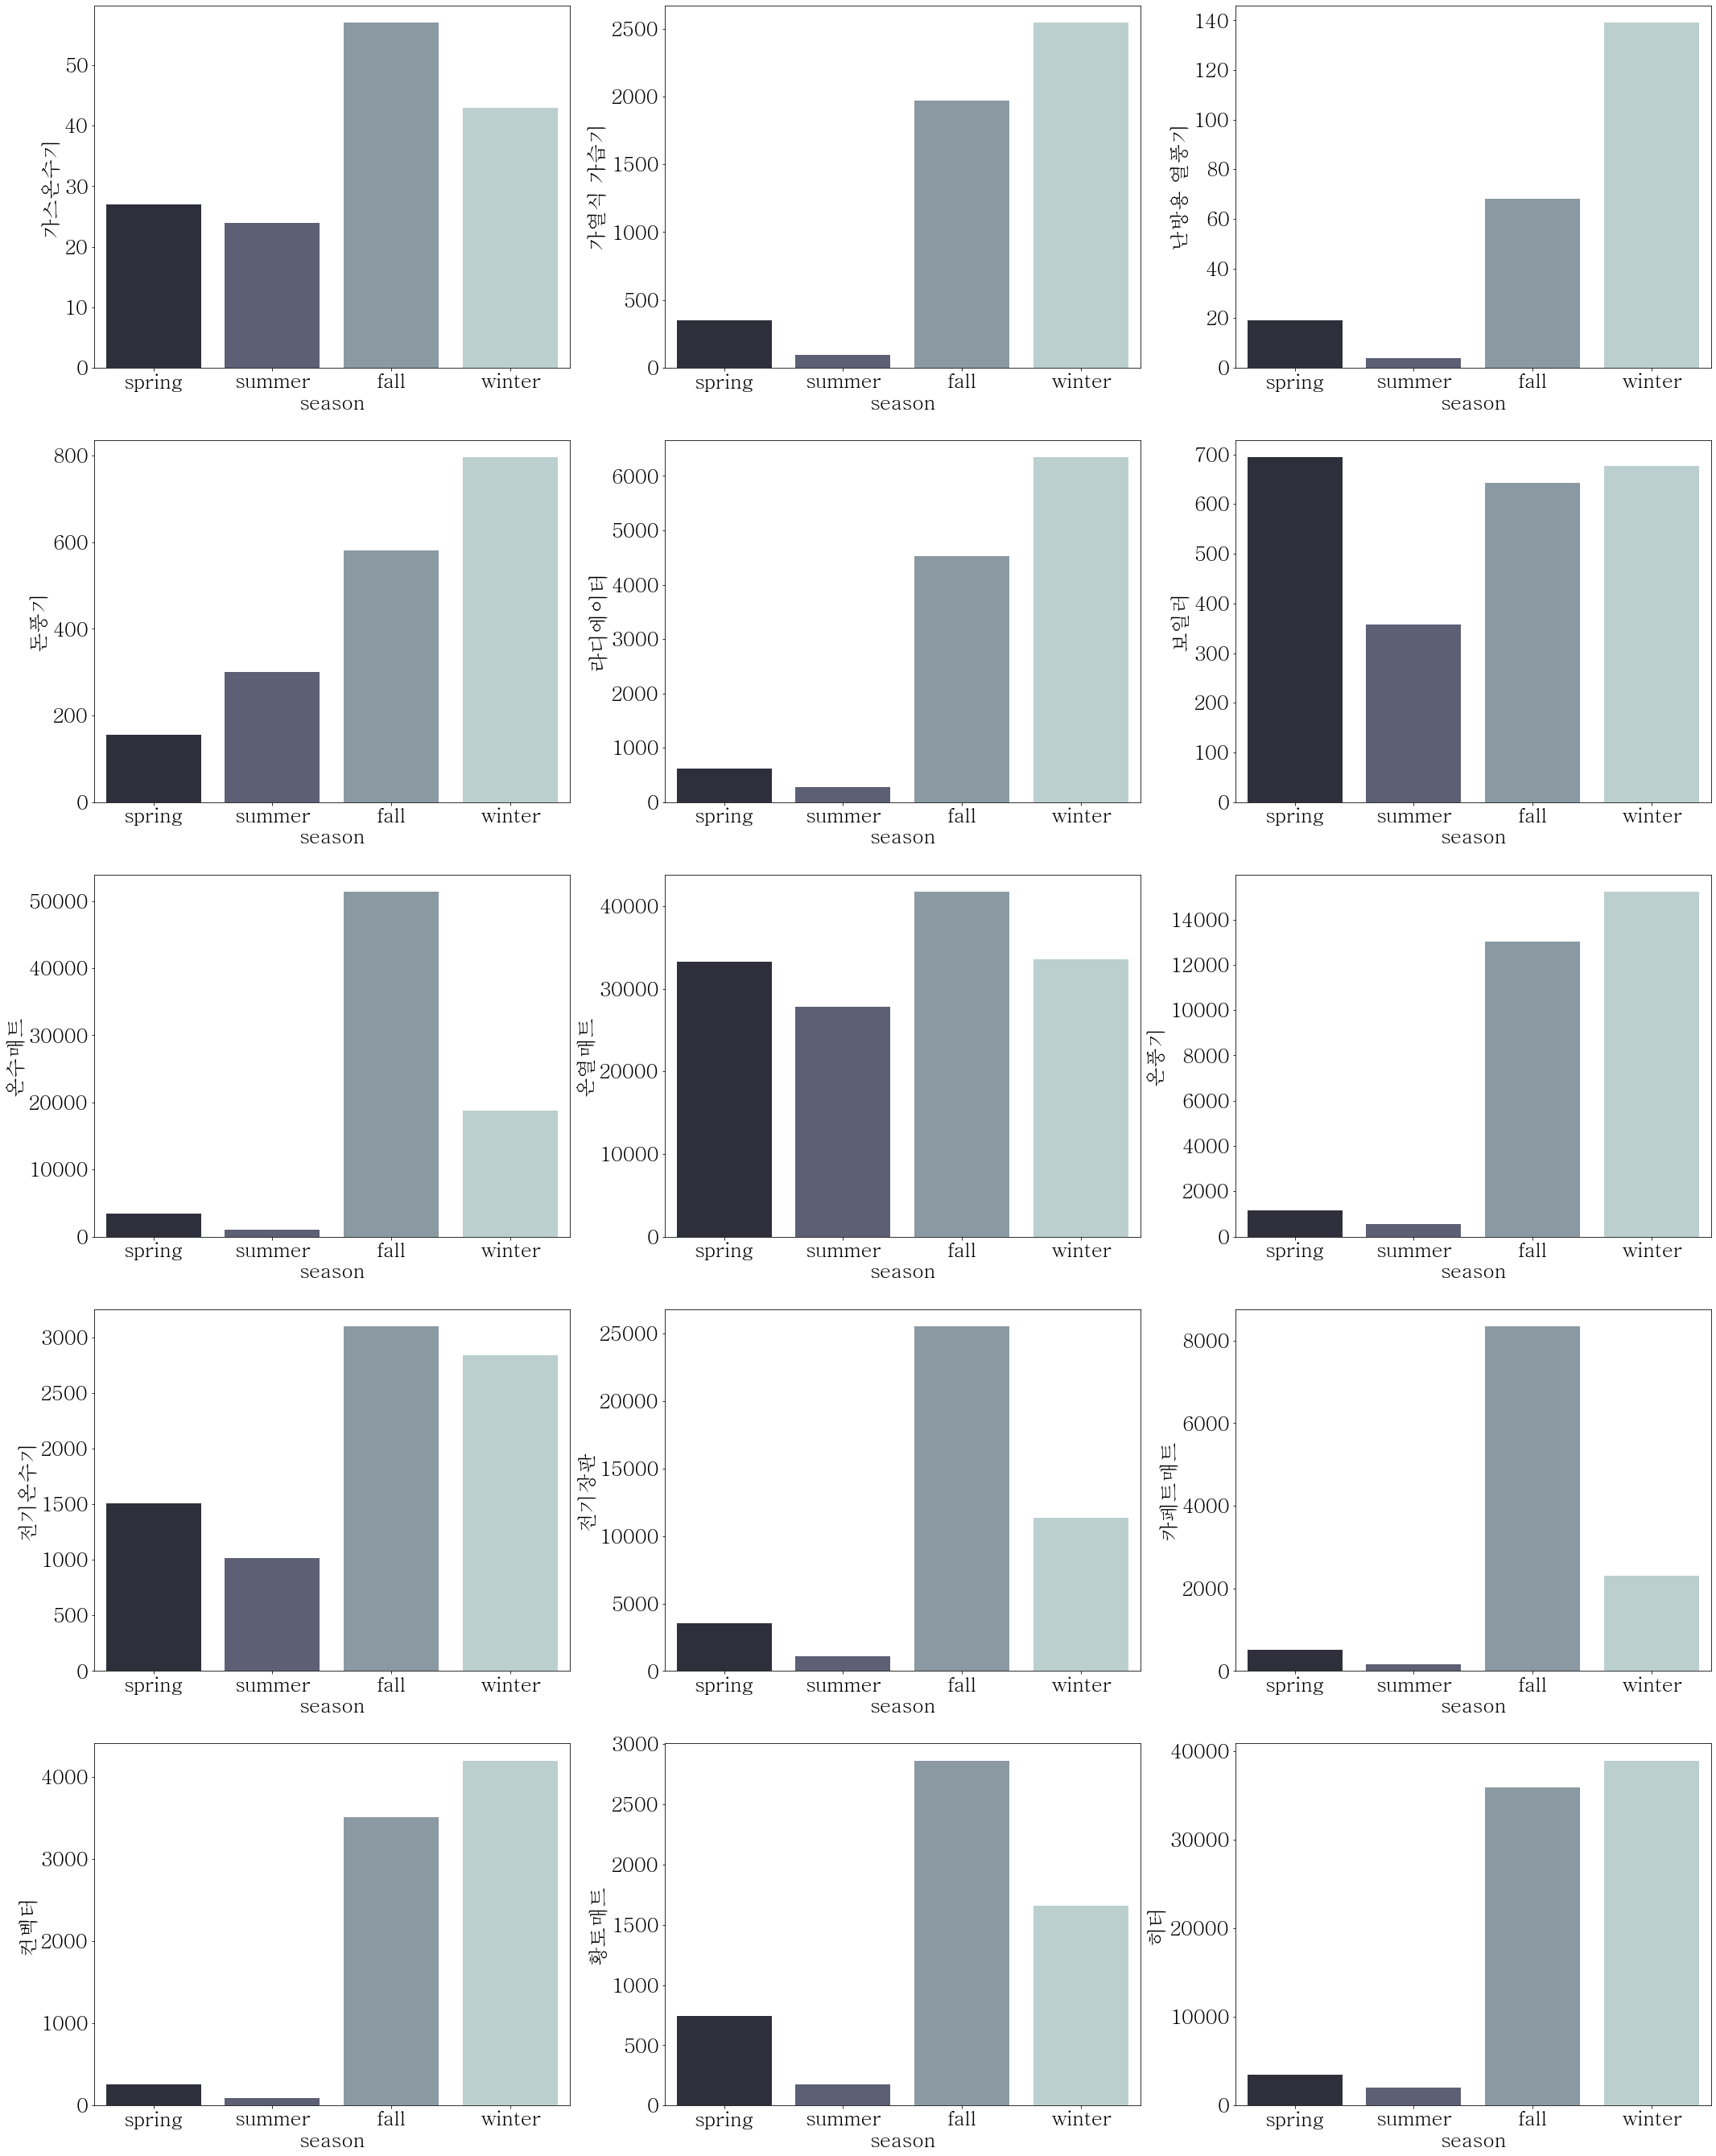

In [38]:
# 각 상품에 대해 계절별 판매량 그래프 출력


plt.figure(figsize=[36,48])
plt.subplot(5,3,1)
sns.barplot(data=buy_ALL,x='season',y='가스온수기',palette='bone')

plt.subplot(5,3,2)
sns.barplot(data=buy_ALL,x='season',y='가열식 가습기',palette='bone')

plt.subplot(5,3,3)
sns.barplot(data=buy_ALL,x='season',y='난방용 열풍기',palette='bone')

plt.subplot(5,3,4)
sns.barplot(data=buy_ALL,x='season',y='돈풍기',palette='bone')

plt.subplot(5,3,5)
sns.barplot(data=buy_ALL,x='season',y='라디에이터',palette='bone')

plt.subplot(5,3,6)
sns.barplot(data=buy_ALL,x='season',y='보일러',palette='bone')

plt.subplot(5,3,7)
sns.barplot(data=buy_ALL,x='season',y='온수매트',palette='bone')

plt.subplot(5,3,8)
sns.barplot(data=buy_ALL,x='season',y='온열매트',palette='bone')

plt.subplot(5,3,9)
sns.barplot(data=buy_ALL,x='season',y='온풍기',palette='bone')

plt.subplot(5,3,10)
sns.barplot(data=buy_ALL,x='season',y='전기온수기',palette='bone')

plt.subplot(5,3,11)
sns.barplot(data=buy_ALL,x='season',y='전기장판',palette='bone')

plt.subplot(5,3,12)
sns.barplot(data=buy_ALL,x='season',y='카페트매트',palette='bone')

plt.subplot(5,3,13)
sns.barplot(data=buy_ALL,x='season',y='컨벡터',palette='bone')

plt.subplot(5,3,14)
sns.barplot(data=buy_ALL,x='season',y='황토매트',palette='bone')

plt.subplot(5,3,15)
sns.barplot(data=buy_ALL,x='season',y='히터',palette='bone')

In [39]:
# 계절별 냉방가전의 판매량 합계
buy_ALL_sum = buy_ALL.sum(axis=1)
buy_ALL_sum

0     49795
1     34951
2    193253
3    139327
dtype: int64

In [40]:
explode=(0,0,0.02,0.02)

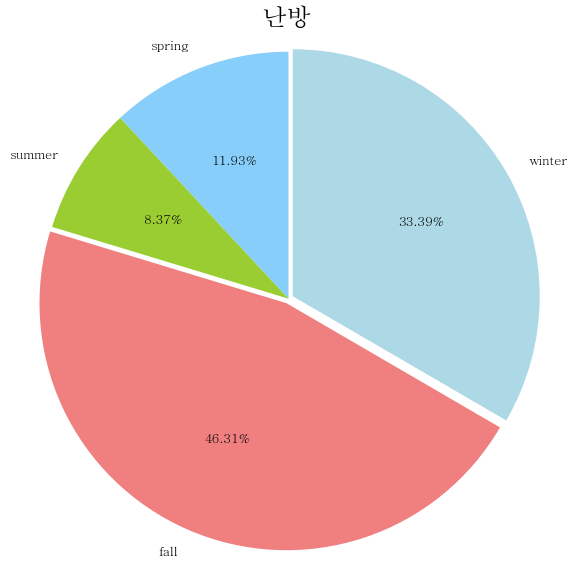

In [41]:
# 냉방가전 전체 판매량의 계절별 비율

plt.pie(buy_ALL_sum,
        explode=explode,
        labels=names,
        autopct='%1.2f%%',
        colors=['lightskyblue','yellowgreen','lightcoral','lightblue'],
       shadow=False,
       startangle=90,
       textprops={'fontsize':13})
plt.axis('equal')
plt.title('난방',fontsize=25)
plt.show()

### 냉난방

**냉난방**

벽걸이형 냉온풍기 / 스탠드형 냉온풍기


In [42]:
buy_fd_1_2=buy_fd.loc[['스탠드형 냉온풍기','벽걸이형 냉온풍기']]
buy_fd_1_2.reset_index(inplace=True)
buy_fd_1_2

,sm_cat,일시,qty
0,스탠드형 냉온풍기,2018-01-01,4
1,스탠드형 냉온풍기,2018-01-02,8
2,스탠드형 냉온풍기,2018-01-03,21
3,스탠드형 냉온풍기,2018-01-04,4
4,스탠드형 냉온풍기,2018-01-05,11
...,...,...,...
1199,벽걸이형 냉온풍기,2019-12-23,2
1200,벽걸이형 냉온풍기,2019-12-24,1
1201,벽걸이형 냉온풍기,2019-12-25,3
1202,벽걸이형 냉온풍기,2019-12-26,1


In [43]:
# 구매 데이터와 기상 데이터 병합

buy_weather_1_2=pd.merge(buy_fd_1_2,total_1, how='left', left_on='일시', right_on='일시')
buy_weather_1_2

,sm_cat,일시,qty,평균기온(°C),최저기온(°C),최고기온(°C),체감온도,열지수
0,스탠드형 냉온풍기,2018-01-01,4,-1.076923,-5.607495,4.460158,-0.691516,22.791758
1,스탠드형 냉온풍기,2018-01-02,8,-0.494862,-5.861067,4.953755,-0.108084,23.947132
2,스탠드형 냉온풍기,2018-01-03,21,-2.437154,-6.161660,2.143676,-2.749178,20.096956
3,스탠드형 냉온풍기,2018-01-04,4,-2.477909,-6.495661,1.413807,-1.923698,20.018996
4,스탠드형 냉온풍기,2018-01-05,11,-0.992110,-4.478063,3.713241,-0.750031,22.962141
...,...,...,...,...,...,...,...,...
1199,벽걸이형 냉온풍기,2019-12-23,2,3.455490,-1.149902,8.038114,4.160586,31.776723
1200,벽걸이형 냉온풍기,2019-12-24,1,1.623922,-2.413137,8.173137,2.866271,28.149075
1201,벽걸이형 냉온풍기,2019-12-25,3,3.339961,-2.912109,10.150391,4.717644,31.542947
1202,벽걸이형 냉온풍기,2019-12-26,1,3.335992,0.450584,6.110506,3.589017,31.538200


In [44]:
df_time_1_2 = pd.to_datetime(buy_weather_1_2.일시) 
datetime_index_1_2 = pd.DatetimeIndex(df_time_1_2.values) 
buy_weather_1_2 = buy_weather_1_2.set_index(datetime_index_1_2)


# 계절별로 분류

# 겨울(12월, 1월, 2월)

buy_1=buy_weather_1_2[buy_weather_1_2.index.month == 1]
buy_1.reset_index(inplace=True)
buy_1.drop(['index'],axis=1,inplace=True)

buy_2=buy_weather_1_2[buy_weather_1_2.index.month == 2]
buy_2.reset_index(inplace=True)
buy_2.drop(['index'],axis=1,inplace=True)

buy_12=buy_weather_1_2[buy_weather_1_2.index.month == 12]
buy_12.reset_index(inplace=True)
buy_12.drop(['index'],axis=1,inplace=True)

buy_winter=pd.concat([buy_1,buy_2,buy_12],ignore_index = True)
buy_winter

buy_winter=buy_winter.groupby(['sm_cat'])['qty'].sum()
buy_winter=pd.DataFrame(buy_winter)
buy_winter=buy_winter.rename(columns={'qty':'winter'})
buy_winter.reset_index(inplace=True)


# ===========================================================================================

# 봄(3월, 4월, 5월)
buy_3=buy_weather_1_2[buy_weather_1_2.index.month == 3]
buy_3.reset_index(inplace=True)
buy_3.drop(['index'],axis=1,inplace=True)

buy_4=buy_weather_1_2[buy_weather_1_2.index.month == 4]
buy_4.reset_index(inplace=True)
buy_4.drop(['index'],axis=1,inplace=True)

buy_5=buy_weather_1_2[buy_weather_1_2.index.month == 5]
buy_5.reset_index(inplace=True)
buy_5.drop(['index'],axis=1,inplace=True)

buy_spring=pd.concat([buy_3,buy_4,buy_5],ignore_index = True)
buy_spring

buy_spring=buy_spring.groupby(['sm_cat'])['qty'].sum()
buy_spring=pd.DataFrame(buy_spring)
buy_spring=buy_spring.rename(columns={'qty':'spring'})
buy_spring.reset_index(inplace=True)


# ===========================================================================================

# 여름(6월, 7월, 8월)
buy_6=buy_weather_1_2[buy_weather_1_2.index.month == 6]
buy_6.reset_index(inplace=True)
buy_6.drop(['index'],axis=1,inplace=True)

buy_7=buy_weather_1_2[buy_weather_1_2.index.month == 7]
buy_7.reset_index(inplace=True)
buy_7.drop(['index'],axis=1,inplace=True)

buy_8=buy_weather_1_2[buy_weather_1_2.index.month == 8]
buy_8.reset_index(inplace=True)
buy_8.drop(['index'],axis=1,inplace=True)

buy_summer=pd.concat([buy_6,buy_7,buy_8],ignore_index = True)
buy_summer

buy_summer=buy_summer.groupby(['sm_cat'])['qty'].sum()
buy_summer=pd.DataFrame(buy_summer)
buy_summer=buy_summer.rename(columns={'qty':'summer'})
buy_summer.reset_index(inplace=True)


# ===========================================================================================

# 가을(9월, 10월, 11월)
buy_9=buy_weather_1_2[buy_weather_1_2.index.month == 9]
buy_9.reset_index(inplace=True)
buy_9.drop(['index'],axis=1,inplace=True)

buy_10=buy_weather_1_2[buy_weather_1_2.index.month == 10]
buy_10.reset_index(inplace=True)
buy_10.drop(['index'],axis=1,inplace=True)

buy_11=buy_weather_1_2[buy_weather_1_2.index.month == 11]
buy_11.reset_index(inplace=True)
buy_11.drop(['index'],axis=1,inplace=True)

buy_fall=pd.concat([buy_9,buy_10,buy_11],ignore_index = True)
buy_fall

buy_fall=buy_fall.groupby(['sm_cat'])['qty'].sum()
buy_fall=pd.DataFrame(buy_fall)
buy_fall=buy_fall.rename(columns={'qty':'fall'})
buy_fall.reset_index(inplace=True)

In [45]:
buy_ALL=pd.merge(buy_spring,buy_summer,how='outer',left_on='sm_cat',right_on='sm_cat')    # 봄, 여룸 병합

In [46]:
buy_ALL=pd.merge(buy_ALL,buy_fall,how='outer',left_on='sm_cat',right_on='sm_cat')    # 봄, 여룸, 가을 병합

In [47]:
buy_ALL=pd.merge(buy_ALL,buy_winter,how='outer',left_on='sm_cat',right_on='sm_cat')    # 봄, 여룸, 가을, 겨울 병합

In [48]:
buy_ALL=buy_ALL.set_index('sm_cat')
buy_ALL

,spring,summer,fall,winter
sm_cat,,,,
벽걸이형 냉온풍기,592,606,165,205
스탠드형 냉온풍기,3175,3370,1274,1666


In [49]:
buy_ALL=buy_ALL.T

In [50]:
buy_ALL.reset_index(inplace=True)
buy_ALL.rename(columns={'index':'season'},inplace=True)
buy_ALL

sm_cat,season,벽걸이형 냉온풍기,스탠드형 냉온풍기
0,spring,592,3175
1,summer,606,3370
2,fall,165,1274
3,winter,205,1666


<AxesSubplot:xlabel='season', ylabel='스탠드형 냉온풍기'>

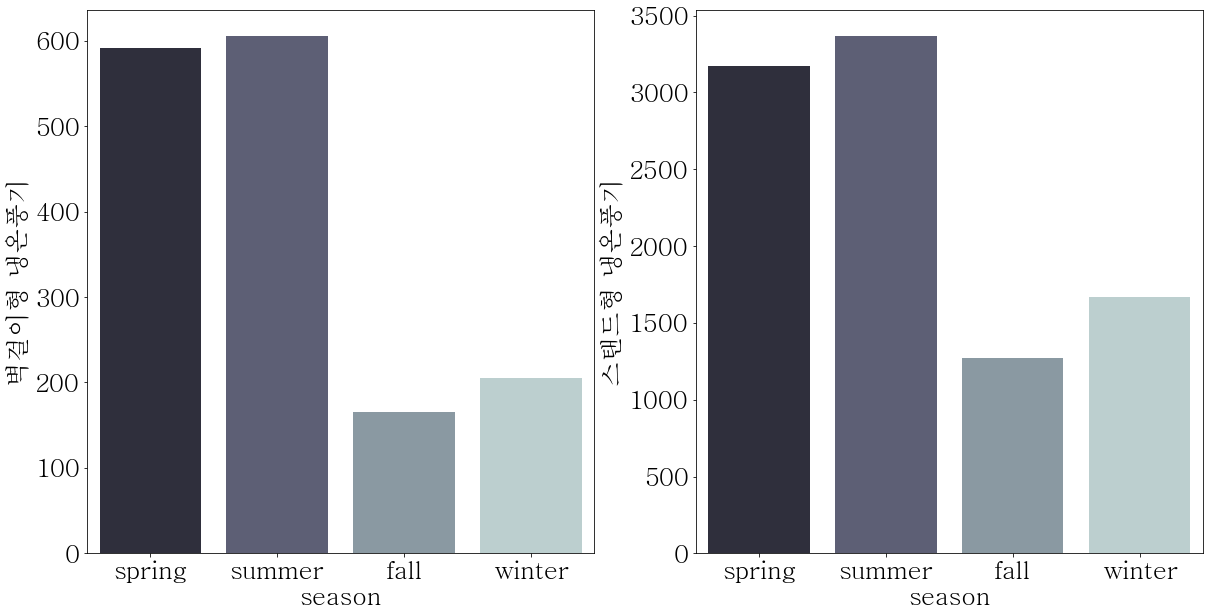

In [51]:
# 각 상품에 대해 계절별 판매량 그래프 출력


plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
sns.barplot(data=buy_ALL,x='season',y='벽걸이형 냉온풍기',palette='bone')

plt.subplot(1,2,2)
sns.barplot(data=buy_ALL,x='season',y='스탠드형 냉온풍기',palette='bone')

In [52]:
# 계절별 냉방가전의 판매량 합계

buy_ALL_sum = buy_ALL.sum(axis=1)
buy_ALL_sum

0    3767
1    3976
2    1439
3    1871
dtype: int64

In [53]:
explode=(0.02,0.01,0,0)

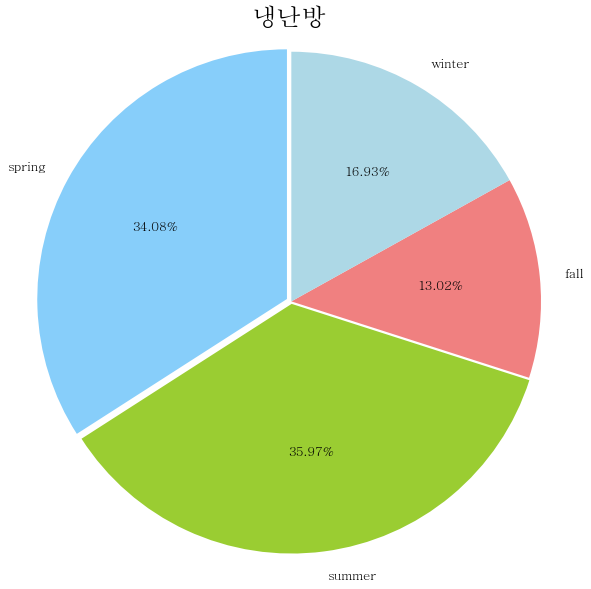

In [54]:
# 냉방가전 전체 판매량의 계절별 비율

plt.pie(buy_ALL_sum,
        explode=explode,
        labels=names,
        autopct='%1.2f%%',
        colors=['lightskyblue','yellowgreen','lightcoral','lightblue'],
       shadow=False,
       startangle=90,
       textprops={'fontsize':13})
plt.axis('equal')
plt.title('냉난방',fontsize=25)
plt.show()

### 습도조절

**습도조절**

제습기 / 초음파식 가습기 / 자연식 가습기 / 복합식 가습기 / 신발건조기 / 의류건조기 / 가열식 가습기 / 에어워셔


In [55]:
buy_fd_2=buy_fd.loc[['제습기','초음파식 가습기','자연식 가습기','복합식 가습기','신발건조기','의류건조기','가열식 가습기','에어워셔']]
buy_fd_2.reset_index(inplace=True)
buy_fd_2

,sm_cat,일시,qty
0,제습기,2018-01-01,24
1,제습기,2018-01-02,24
2,제습기,2018-01-03,16
3,제습기,2018-01-04,7
4,제습기,2018-01-05,15
...,...,...,...
5340,에어워셔,2019-12-27,12
5341,에어워셔,2019-12-28,7
5342,에어워셔,2019-12-29,16
5343,에어워셔,2019-12-30,16


In [56]:
total_2=pd.read_csv(r'TOTAL_습도.csv')
total_2=total_2.drop(['Unnamed: 0'],axis=1)
total_2

,일시,평균기온(°C),최저기온(°C),최고기온(°C),체감온도,열지수
0,2018-01-01,-1.076923,-5.607495,4.460158,-0.691516,22.791758
1,2018-01-02,-0.494862,-5.861067,4.953755,-0.108084,23.947132
2,2018-01-03,-2.437154,-6.161660,2.143676,-2.749178,20.096956
3,2018-01-04,-2.477909,-6.495661,1.413807,-1.923698,20.018996
4,2018-01-05,-0.992110,-4.478063,3.713241,-0.750031,22.962141
...,...,...,...,...,...,...
725,2019-12-27,-0.089084,-3.803899,4.322612,-0.257046,24.749457
726,2019-12-28,0.474903,-4.850980,6.946667,1.654966,25.869496
727,2019-12-29,3.173879,-1.854813,7.169941,4.108163,31.219883
728,2019-12-30,4.653137,-0.840119,9.321739,4.941824,34.151001


In [57]:
# 구매 데이터와 기상 데이터 병합

buy_weather_2=pd.merge(buy_fd_2,total_2, how='left', left_on='일시', right_on='일시')
buy_weather_2

,sm_cat,일시,qty,평균기온(°C),최저기온(°C),최고기온(°C),체감온도,열지수
0,제습기,2018-01-01,24,-1.076923,-5.607495,4.460158,-0.691516,22.791758
1,제습기,2018-01-02,24,-0.494862,-5.861067,4.953755,-0.108084,23.947132
2,제습기,2018-01-03,16,-2.437154,-6.161660,2.143676,-2.749178,20.096956
3,제습기,2018-01-04,7,-2.477909,-6.495661,1.413807,-1.923698,20.018996
4,제습기,2018-01-05,15,-0.992110,-4.478063,3.713241,-0.750031,22.962141
...,...,...,...,...,...,...,...,...
5340,에어워셔,2019-12-27,12,-0.089084,-3.803899,4.322612,-0.257046,24.749457
5341,에어워셔,2019-12-28,7,0.474903,-4.850980,6.946667,1.654966,25.869496
5342,에어워셔,2019-12-29,16,3.173879,-1.854813,7.169941,4.108163,31.219883
5343,에어워셔,2019-12-30,16,4.653137,-0.840119,9.321739,4.941824,34.151001


In [58]:
df_time_2 = pd.to_datetime(buy_weather_2.일시) 
datetime_index_2 = pd.DatetimeIndex(df_time_2.values) 
buy_weather_2 = buy_weather_2.set_index(datetime_index_2)


# 계절별로 분류

# 겨울(12월, 1월, 2월)
buy_12=buy_weather_2[buy_weather_2.index.month == 12]
buy_12.reset_index(inplace=True)
buy_12.drop(['index'],axis=1,inplace=True)

buy_1=buy_weather_2[buy_weather_2.index.month == 1]
buy_1.reset_index(inplace=True)
buy_1.drop(['index'],axis=1,inplace=True)

buy_2=buy_weather_2[buy_weather_2.index.month == 2]
buy_2.reset_index(inplace=True)
buy_2.drop(['index'],axis=1,inplace=True)

buy_winter=pd.concat([buy_12,buy_1,buy_2],ignore_index = True)

buy_winter=buy_winter.groupby(['sm_cat'])['qty'].sum()
buy_winter=pd.DataFrame(buy_winter)
buy_winter=buy_winter.rename(columns={'qty':'winter'})
buy_winter.reset_index(inplace=True)
buy_winter


# ===========================================================================================

# 봄(3월, 4월, 5월)
buy_3=buy_weather_2[buy_weather_2.index.month == 3]
buy_3.reset_index(inplace=True)
buy_3.drop(['index'],axis=1,inplace=True)

buy_4=buy_weather_2[buy_weather_2.index.month == 4]
buy_4.reset_index(inplace=True)
buy_4.drop(['index'],axis=1,inplace=True)

buy_5=buy_weather_2[buy_weather_2.index.month == 5]
buy_5.reset_index(inplace=True)
buy_5.drop(['index'],axis=1,inplace=True)

buy_spring=pd.concat([buy_3,buy_4,buy_5],ignore_index = True)

buy_spring=buy_spring.groupby(['sm_cat'])['qty'].sum()
buy_spring=pd.DataFrame(buy_spring)
buy_spring=buy_spring.rename(columns={'qty':'spring'})
buy_spring.reset_index(inplace=True)
buy_spring


# ===========================================================================================

# 여름(6월, 7월, 8월)

buy_6=buy_weather_2[buy_weather_2.index.month == 6]
buy_6.reset_index(inplace=True)
buy_6.drop(['index'],axis=1,inplace=True)

buy_7=buy_weather_2[buy_weather_2.index.month == 7]
buy_7.reset_index(inplace=True)
buy_7.drop(['index'],axis=1,inplace=True)

buy_8=buy_weather_2[buy_weather_2.index.month == 8]
buy_8.reset_index(inplace=True)
buy_8.drop(['index'],axis=1,inplace=True)

buy_summer=pd.concat([buy_6,buy_7,buy_8],ignore_index = True)

buy_summer=buy_summer.groupby(['sm_cat'])['qty'].sum()
buy_summer=pd.DataFrame(buy_summer)
buy_summer=buy_summer.rename(columns={'qty':'summer'})
buy_summer.reset_index(inplace=True)
buy_summer


# ===========================================================================================

# 가을(9월, 10월, 11월)
buy_9=buy_weather_2[buy_weather_2.index.month == 9]
buy_9.reset_index(inplace=True)
buy_9.drop(['index'],axis=1,inplace=True)

buy_10=buy_weather_2[buy_weather_2.index.month == 10]
buy_10.reset_index(inplace=True)
buy_10.drop(['index'],axis=1,inplace=True)

buy_11=buy_weather_2[buy_weather_2.index.month == 11]
buy_11.reset_index(inplace=True)
buy_11.drop(['index'],axis=1,inplace=True)

buy_fall=pd.concat([buy_9,buy_10,buy_11],ignore_index = True)

buy_fall=buy_fall.groupby(['sm_cat'])['qty'].sum()
buy_fall=pd.DataFrame(buy_fall)
buy_fall=buy_fall.rename(columns={'qty':'fall'})
buy_fall.reset_index(inplace=True)
buy_fall

,sm_cat,fall
0,가열식 가습기,1967
1,복합식 가습기,14595
2,신발건조기,398
3,에어워셔,3092
4,의류건조기,11592
5,자연식 가습기,1909
6,제습기,4376
7,초음파식 가습기,31915


In [59]:
buy_ALL=pd.merge(buy_spring,buy_summer,how='outer',left_on='sm_cat',right_on='sm_cat')     # 봄, 여름 병합

In [60]:
buy_ALL=pd.merge(buy_ALL,buy_fall,how='outer',left_on='sm_cat',right_on='sm_cat')     # 봄, 여름, 가을 병합

In [61]:
buy_ALL=pd.merge(buy_ALL,buy_winter,how='outer',left_on='sm_cat',right_on='sm_cat')     # 봄, 여름, 가을, 겨울 병합

In [62]:
buy_ALL

,sm_cat,spring,summer,fall,winter
0,가열식 가습기,348,94,1967,2542
1,복합식 가습기,4817,1443,14595,20421
2,신발건조기,417,292,398,422
3,에어워셔,2141,461,3092,3673
4,의류건조기,17586,11809,11592,16577
5,자연식 가습기,656,293,1909,2441
6,제습기,8863,21885,4376,3043
7,초음파식 가습기,7549,1269,31915,44469


In [63]:
buy_ALL=buy_ALL.set_index('sm_cat')

In [64]:
buy_ALL=buy_ALL.T

In [65]:
buy_ALL.reset_index(inplace=True)
buy_ALL.rename(columns={'index':'season'},inplace=True)
buy_ALL

sm_cat,season,가열식 가습기,복합식 가습기,신발건조기,에어워셔,의류건조기,자연식 가습기,제습기,초음파식 가습기
0,spring,348,4817,417,2141,17586,656,8863,7549
1,summer,94,1443,292,461,11809,293,21885,1269
2,fall,1967,14595,398,3092,11592,1909,4376,31915
3,winter,2542,20421,422,3673,16577,2441,3043,44469


<AxesSubplot:xlabel='season', ylabel='초음파식 가습기'>

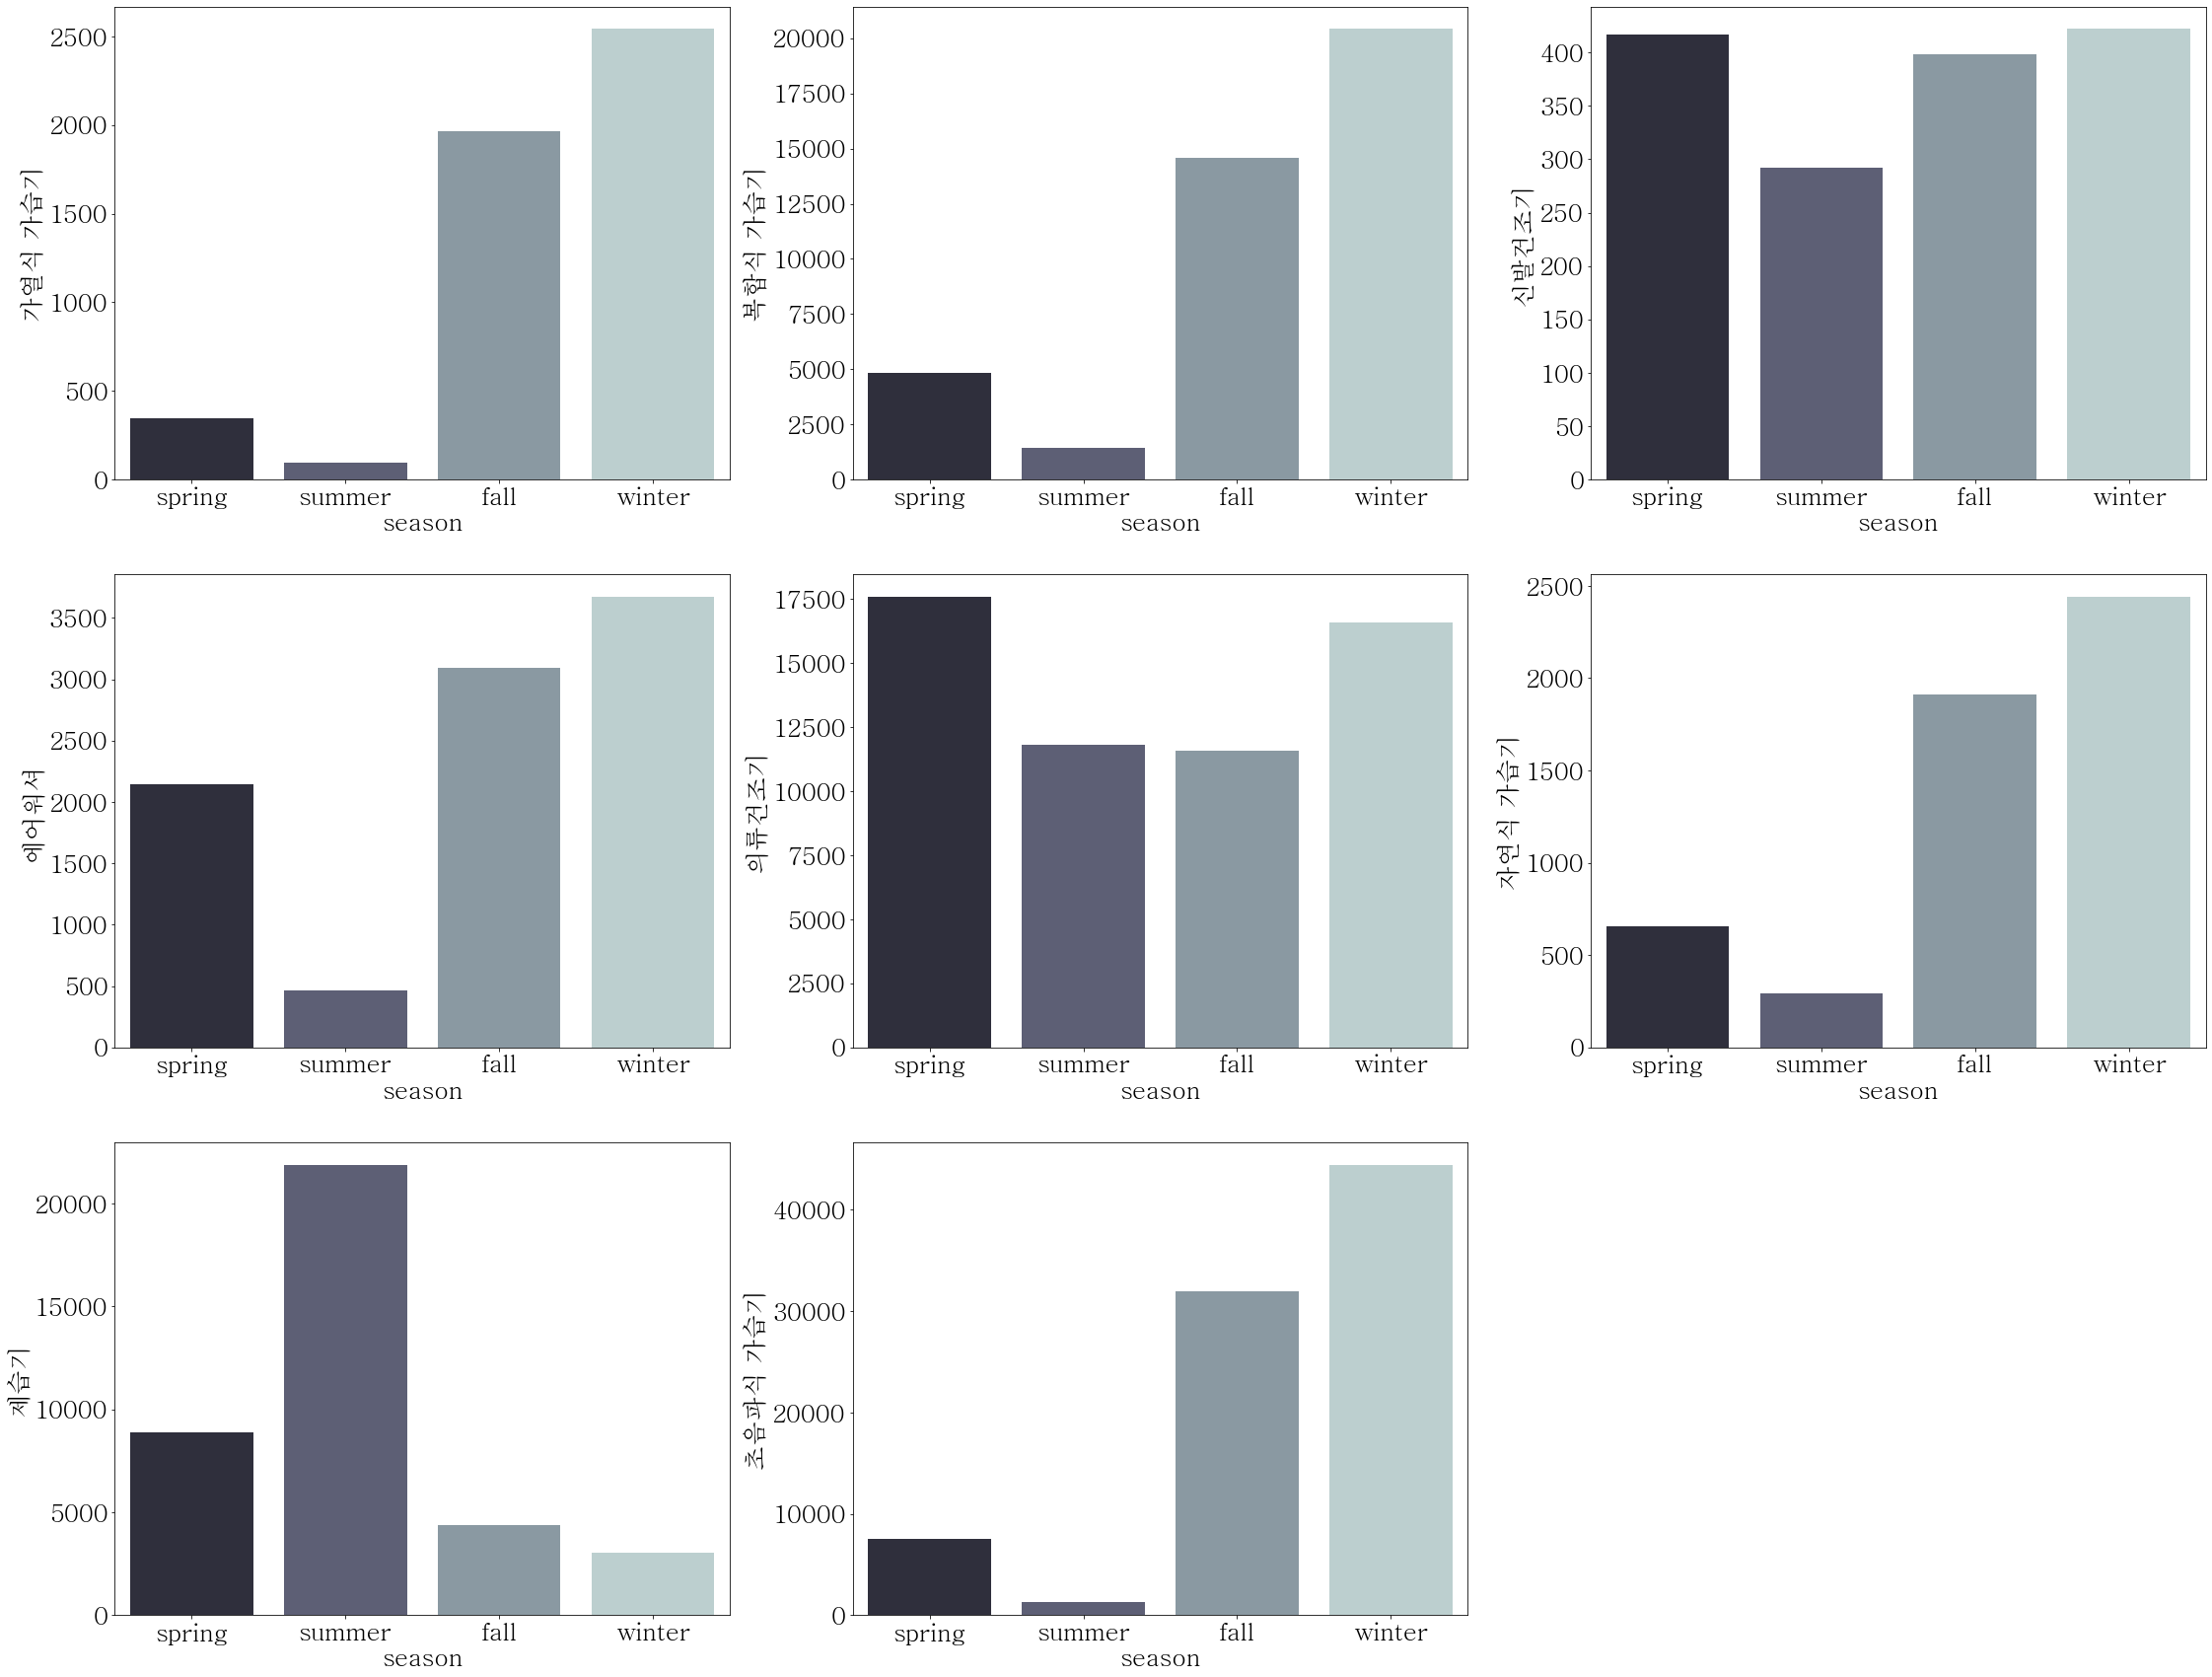

In [66]:
# 각 상품에 대해 계절별 판매량 그래프 출력


plt.figure(figsize=[38,30])
plt.subplot(3,3,1)
sns.barplot(data=buy_ALL,x='season',y='가열식 가습기',palette='bone')

plt.subplot(3,3,2)
sns.barplot(data=buy_ALL,x='season',y='복합식 가습기',palette='bone')

plt.subplot(3,3,3)
sns.barplot(data=buy_ALL,x='season',y='신발건조기',palette='bone')

plt.subplot(3,3,4)
sns.barplot(data=buy_ALL,x='season',y='에어워셔',palette='bone')

plt.subplot(3,3,5)
sns.barplot(data=buy_ALL,x='season',y='의류건조기',palette='bone')

plt.subplot(3,3,6)
sns.barplot(data=buy_ALL,x='season',y='자연식 가습기',palette='bone')

plt.subplot(3,3,7)
sns.barplot(data=buy_ALL,x='season',y='제습기',palette='bone')

plt.subplot(3,3,8)
sns.barplot(data=buy_ALL,x='season',y='초음파식 가습기',palette='bone')


In [67]:
# 계절별 냉방가전의 판매량 합계

buy_ALL_sum = buy_ALL.sum(axis=1)
buy_ALL_sum

0    42377
1    37546
2    69844
3    93588
dtype: int64

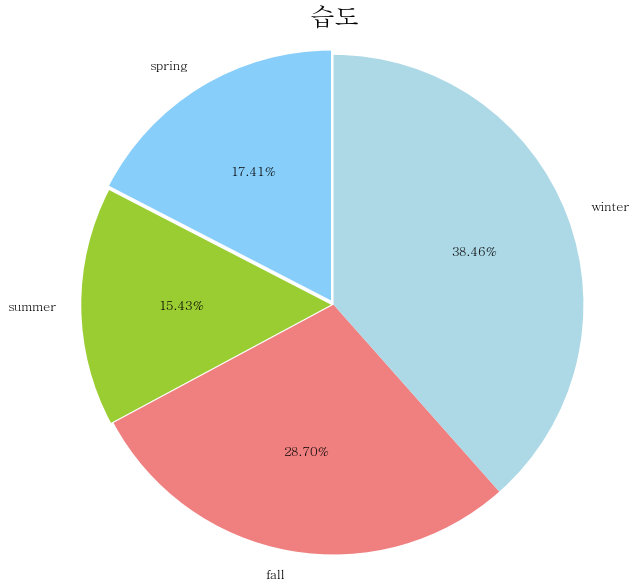

In [68]:
plt.pie(buy_ALL_sum,
        explode=explode,
        labels=names,
        autopct='%1.2f%%',
        colors=['lightskyblue','yellowgreen','lightcoral','lightblue'],
       shadow=False,
       startangle=90,
       textprops={'fontsize':13})
plt.axis('equal')
plt.title('습도',fontsize=25)
plt.show()

### 공기 정화

**공기정화**

공기청정기 / 공기정화 용품 / 산림욕기


In [69]:
buy_fd_3=buy_fd.loc[['공기청정기','공기정화 용품','산림욕기']]
buy_fd_3.reset_index(inplace=True)
buy_fd_3

,sm_cat,일시,qty
0,공기청정기,2018-01-01,106
1,공기청정기,2018-01-02,147
2,공기청정기,2018-01-03,103
3,공기청정기,2018-01-04,77
4,공기청정기,2018-01-05,141
...,...,...,...
1549,산림욕기,2019-11-23,1
1550,산림욕기,2019-11-28,2
1551,산림욕기,2019-12-10,2
1552,산림욕기,2019-12-11,1


In [70]:
# 공기 정화 제품이므로 대기질 관련 지표만 추출

total_3=pd.read_csv(r'TOTAL_공기.csv')
total_3=total_3.drop(['Unnamed: 0'],axis=1)
total_3

,일시,일 미세먼지 농도(㎍/㎥)
0,2018-01-01,32.962963
1,2018-01-02,40.037037
2,2018-01-03,23.185185
3,2018-01-04,26.423077
4,2018-01-05,29.642857
...,...,...
725,2019-12-27,22.655172
726,2019-12-28,32.862069
727,2019-12-29,34.172414
728,2019-12-30,24.296296


In [71]:
buy_weather_3=pd.merge(buy_fd_3,total_3, how='left', left_on='일시', right_on='일시')
buy_weather_3

,sm_cat,일시,qty,일 미세먼지 농도(㎍/㎥)
0,공기청정기,2018-01-01,106,32.962963
1,공기청정기,2018-01-02,147,40.037037
2,공기청정기,2018-01-03,103,23.185185
3,공기청정기,2018-01-04,77,26.423077
4,공기청정기,2018-01-05,141,29.642857
...,...,...,...,...
1549,산림욕기,2019-11-23,1,24.965517
1550,산림욕기,2019-11-28,2,28.000000
1551,산림욕기,2019-12-10,2,64.740741
1552,산림욕기,2019-12-11,1,52.178571


In [72]:
df_time_3 = pd.to_datetime(buy_weather_3.일시) 
datetime_index_3 = pd.DatetimeIndex(df_time_3.values) 
buy_weather_3 = buy_weather_3.set_index(datetime_index_3)


# 계절별로 분류

# 겨울(12월, 1월, 2월)
buy_12=buy_weather_3[buy_weather_3.index.month == 12]
buy_12.reset_index(inplace=True)
buy_12.drop(['index'],axis=1,inplace=True)

buy_1=buy_weather_3[buy_weather_3.index.month == 1]
buy_1.reset_index(inplace=True)
buy_1.drop(['index'],axis=1,inplace=True)

buy_2=buy_weather_3[buy_weather_3.index.month == 2]
buy_2.reset_index(inplace=True)
buy_2.drop(['index'],axis=1,inplace=True)

buy_winter=pd.concat([buy_12,buy_1,buy_2],ignore_index = True)

buy_winter=buy_winter.groupby(['sm_cat'])['qty'].sum()
buy_winter=pd.DataFrame(buy_winter)
buy_winter=buy_winter.rename(columns={'qty':'winter'})
buy_winter.reset_index(inplace=True)
buy_winter


# ===========================================================================================

# 봄(3월, 4월, 5월)
buy_3=buy_weather_3[buy_weather_3.index.month == 3]
buy_3.reset_index(inplace=True)
buy_3.drop(['index'],axis=1,inplace=True)

buy_4=buy_weather_3[buy_weather_3.index.month == 4]
buy_4.reset_index(inplace=True)
buy_4.drop(['index'],axis=1,inplace=True)

buy_5=buy_weather_3[buy_weather_3.index.month == 5]
buy_5.reset_index(inplace=True)
buy_5.drop(['index'],axis=1,inplace=True)

buy_spring=pd.concat([buy_3,buy_4,buy_5],ignore_index = True)

buy_spring=buy_spring.groupby(['sm_cat'])['qty'].sum()
buy_spring=pd.DataFrame(buy_spring)
buy_spring=buy_spring.rename(columns={'qty':'spring'})
buy_spring.reset_index(inplace=True)
buy_spring


# ===========================================================================================

# 여름(6월, 7월, 8월)
buy_6=buy_weather_3[buy_weather_3.index.month == 6]
buy_6.reset_index(inplace=True)
buy_6.drop(['index'],axis=1,inplace=True)

buy_7=buy_weather_3[buy_weather_3.index.month == 7]
buy_7.reset_index(inplace=True)
buy_7.drop(['index'],axis=1,inplace=True)

buy_8=buy_weather_3[buy_weather_3.index.month == 8]
buy_8.reset_index(inplace=True)
buy_8.drop(['index'],axis=1,inplace=True)

buy_summer=pd.concat([buy_6,buy_7,buy_8],ignore_index = True)

buy_summer=buy_summer.groupby(['sm_cat'])['qty'].sum()
buy_summer=pd.DataFrame(buy_summer)
buy_summer=buy_summer.rename(columns={'qty':'summer'})
buy_summer.reset_index(inplace=True)
buy_summer


# ===========================================================================================

# 가을(9월, 10월, 11월)
buy_9=buy_weather_3[buy_weather_3.index.month == 9]
buy_9.reset_index(inplace=True)
buy_9.drop(['index'],axis=1,inplace=True)

buy_10=buy_weather_3[buy_weather_3.index.month == 10]
buy_10.reset_index(inplace=True)
buy_10.drop(['index'],axis=1,inplace=True)

buy_11=buy_weather_3[buy_weather_3.index.month == 11]
buy_11.reset_index(inplace=True)
buy_11.drop(['index'],axis=1,inplace=True)

buy_fall=pd.concat([buy_9,buy_10,buy_11],ignore_index = True)

buy_fall=buy_fall.groupby(['sm_cat'])['qty'].sum()
buy_fall=pd.DataFrame(buy_fall)
buy_fall=buy_fall.rename(columns={'qty':'fall'})
buy_fall.reset_index(inplace=True)
buy_fall



,sm_cat,fall
0,공기정화 용품,24039
1,공기청정기,18063
2,산림욕기,38


In [73]:
buy_ALL=pd.merge(buy_spring,buy_summer,how='outer',left_on='sm_cat',right_on='sm_cat')     # 봄, 여름 병합

In [74]:
buy_ALL=pd.merge(buy_ALL,buy_fall,how='outer',left_on='sm_cat',right_on='sm_cat')     # 봄, 여름, 가을 병합

In [75]:
buy_ALL=pd.merge(buy_ALL,buy_winter,how='outer',left_on='sm_cat',right_on='sm_cat')     # 봄, 여름, 가을, 겨울 병합

In [76]:
buy_ALL=buy_ALL.set_index('sm_cat')

In [77]:
buy_ALL=buy_ALL.T

In [78]:
buy_ALL.reset_index(inplace=True)
buy_ALL.rename(columns={'index':'season'},inplace=True)
buy_ALL

sm_cat,season,공기정화 용품,공기청정기,산림욕기
0,spring,58349,64499,24
1,summer,19117,10723,30
2,fall,24039,18063,38
3,winter,34733,36001,24


<AxesSubplot:xlabel='season', ylabel='산림욕기'>

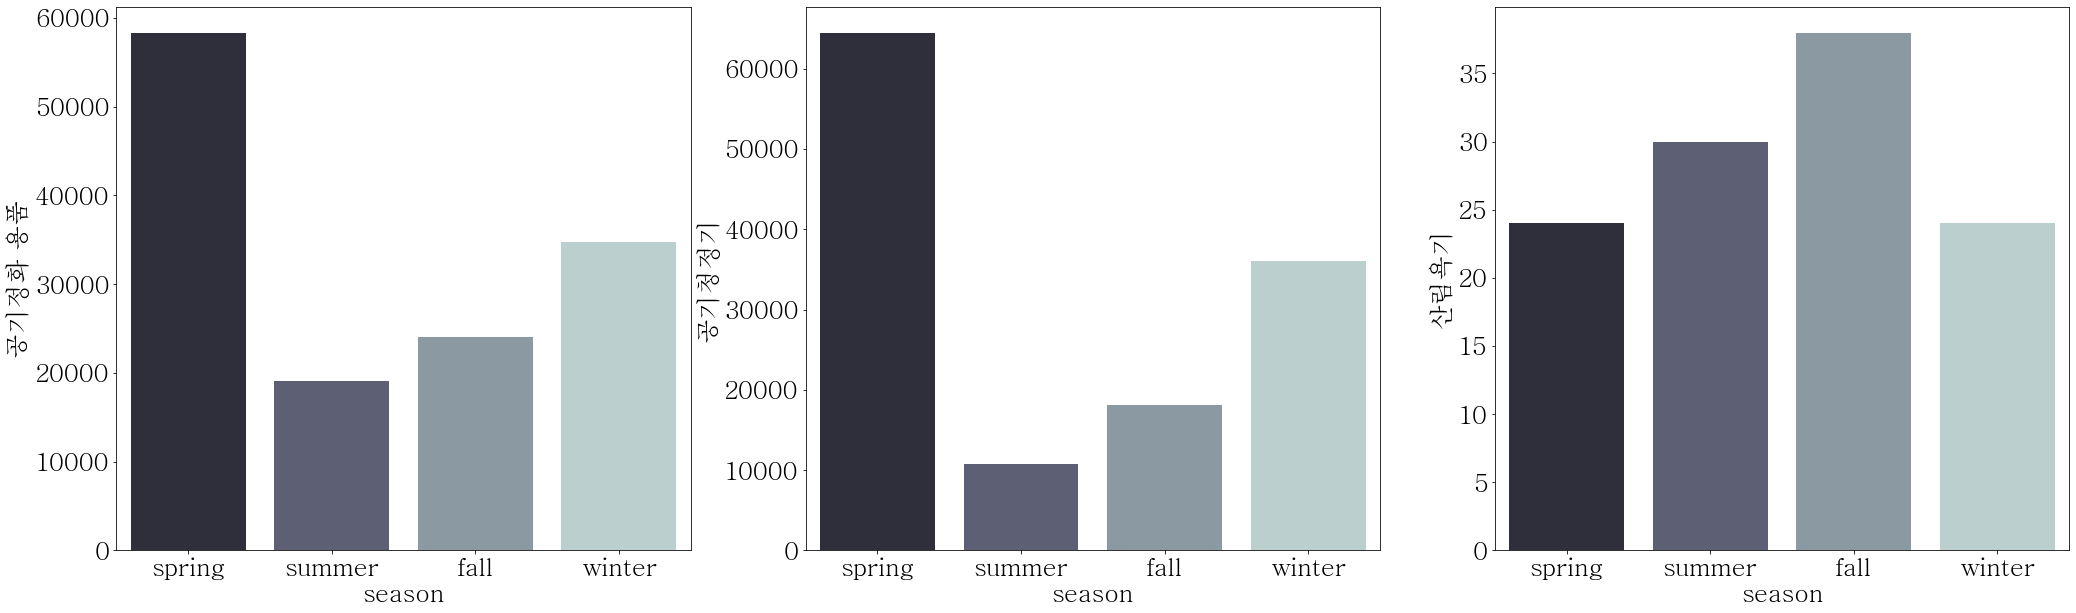

In [79]:
# 각 상품에 대해 계절별 판매량 그래프 출력


plt.figure(figsize=[35,10])
plt.subplot(1,3,1)
sns.barplot(data=buy_ALL,x='season',y='공기정화 용품',palette='bone')

plt.subplot(1,3,2)
sns.barplot(data=buy_ALL,x='season',y='공기청정기',palette='bone')

plt.subplot(1,3,3)
sns.barplot(data=buy_ALL,x='season',y='산림욕기',palette='bone')


In [80]:
# 계절별 냉방가전의 판매량 합계

buy_ALL_sum = buy_ALL.sum(axis=1)
buy_ALL_sum

0    122872
1     29870
2     42140
3     70758
dtype: int64

In [81]:
explode=(0.01,0,0,0.01)

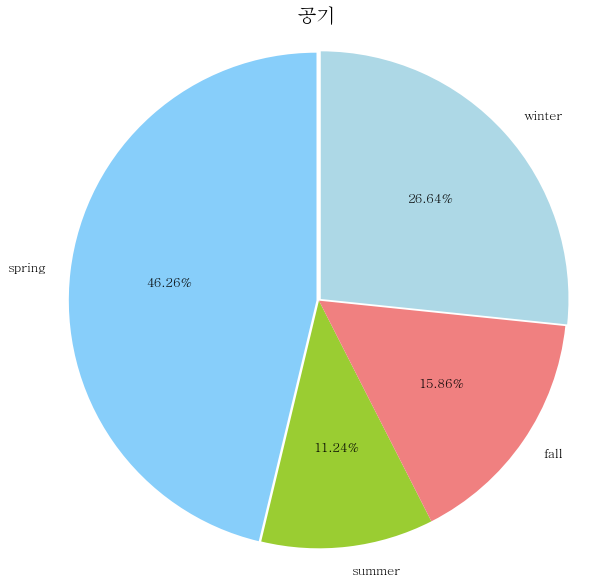

In [82]:
plt.pie(buy_ALL_sum,
        explode=explode,
        labels=names,
        autopct='%1.2f%%',
        colors=['lightskyblue','yellowgreen','lightcoral','lightblue'],
       shadow=False,
       startangle=90,
       textprops={'fontsize':13})
plt.axis('equal')
plt.title('공기',fontsize=20)
plt.show()